In [ ]:
## 数据集比例测试  最好测一下领域迁移的效果

## 语法正确率
'''
数据集切分 
都是在Qwen2.5 7B上做的
'''
import json
files = [
"/home/work/liuytest/大论文/4评估/1数据预处理/scala_1_9_Qwen2.57B_my_prompt.json_result.json", 
"/home/work/liuytest/大论文/4评估/1数据预处理/scala_2_8_Qwen2.57B_my_prompt.json_result.json", 
"/home/work/liuytest/大论文/4评估/1数据预处理/scala_3_7_Qwen2.57B_my_prompt.json_result.json", 
"/home/work/liuytest/大论文/4评估/1数据预处理/scala_4_6_Qwen2.57B_my_prompt.json_result.json", 
"/home/work/liuytest/大论文/4评估/1数据预处理/scala_5_5_Qwen2.57B_my_prompt.json_result.json", 
"/home/work/liuytest/大论文/4评估/1数据预处理/scala_6_4_Qwen2.57B_my_prompt.json_result.json", 
"/home/work/liuytest/大论文/4评估/1数据预处理/scala_7_3_Qwen2.57B_my_prompt.json_result.json", 
"/home/work/liuytest/大论文/4评估/1数据预处理/scala_8_2_Qwen2.57B_my_prompt.json_result.json", 
"/home/work/liuytest/大论文/4评估/1数据预处理/scala_9_1_Qwen2.57B_my_prompt.json_result.json", 
]
import json


for file in files:
    with open(file, 'r',encoding="utf-8") as json_file:
        GLM49B_train_normal_prompt = json.load(json_file)
    err_num = 0
    for row in   GLM49B_train_normal_prompt:
        if row['err'] == True:
            # print(row['instruction'])
            # print(row['output'])
            # print("---------------------------------------")
            err_num = err_num+1

    print(f"{file}结果大小:{len(GLM49B_train_normal_prompt)}.错误个数:{err_num},语法正确率为{100-(err_num/len(GLM49B_train_normal_prompt)*100)}")


/home/work/liuytest/大论文/4评估/1数据预处理/scala_1_9_Qwen2.57B_my_prompt.json_result.json结果大小:1153.错误个数:159,语法正确率为86.20988725065048
/home/work/liuytest/大论文/4评估/1数据预处理/scala_2_8_Qwen2.57B_my_prompt.json_result.json结果大小:1025.错误个数:34,语法正确率为96.6829268292683
/home/work/liuytest/大论文/4评估/1数据预处理/scala_3_7_Qwen2.57B_my_prompt.json_result.json结果大小:897.错误个数:18,语法正确率为97.9933110367893
/home/work/liuytest/大论文/4评估/1数据预处理/scala_4_6_Qwen2.57B_my_prompt.json_result.json结果大小:769.错误个数:13,语法正确率为98.30949284785436
/home/work/liuytest/大论文/4评估/1数据预处理/scala_5_5_Qwen2.57B_my_prompt.json_result.json结果大小:641.错误个数:6,语法正确率为99.06396255850234
/home/work/liuytest/大论文/4评估/1数据预处理/scala_6_4_Qwen2.57B_my_prompt.json_result.json结果大小:513.错误个数:17,语法正确率为96.68615984405459
/home/work/liuytest/大论文/4评估/1数据预处理/scala_7_3_Qwen2.57B_my_prompt.json_result.json结果大小:385.错误个数:11,语法正确率为97.14285714285714
/home/work/liuytest/大论文/4评估/1数据预处理/scala_8_2_Qwen2.57B_my_prompt.json_result.json结果大小:257.错误个数:4,语法正确率为98.44357976653697
/home/work/liuytest/大论文/4

In [3]:
### 语义正确率分析  精确率 召回率  行、列分别分析
import json


with open("/home/work/liuytest/大论文/4评估/ldbc_normal_test_7_3.json_result.json", 'r',encoding="utf-8") as json_file:
    core_train_result = json.load(json_file)

files = [
    "/home/work/liuytest/大论文/4评估/1数据预处理/scala_1_9_Qwen2.57B_my_prompt.json_result.json", 
    "/home/work/liuytest/大论文/4评估/1数据预处理/scala_2_8_Qwen2.57B_my_prompt.json_result.json", 
    "/home/work/liuytest/大论文/4评估/1数据预处理/scala_3_7_Qwen2.57B_my_prompt.json_result.json", 
    "/home/work/liuytest/大论文/4评估/1数据预处理/scala_4_6_Qwen2.57B_my_prompt.json_result.json", 
    "/home/work/liuytest/大论文/4评估/1数据预处理/scala_5_5_Qwen2.57B_my_prompt.json_result.json", 
    "/home/work/liuytest/大论文/4评估/1数据预处理/scala_6_4_Qwen2.57B_my_prompt.json_result.json", 
    "/home/work/liuytest/大论文/4评估/1数据预处理/scala_7_3_Qwen2.57B_my_prompt.json_result.json", 
    "/home/work/liuytest/大论文/4评估/1数据预处理/scala_8_2_Qwen2.57B_my_prompt.json_result.json", 
    "/home/work/liuytest/大论文/4评估/1数据预处理/scala_9_1_Qwen2.57B_my_prompt.json_result.json", 
]
val_files = [
    "/home/work/liuytest/大论文/4评估/scala_with_schema_vector_prompt_test_1_9.json_result.json", 
    "/home/work/liuytest/大论文/4评估/scala_with_schema_vector_prompt_test_2_8.json_result.json", 
    "/home/work/liuytest/大论文/4评估/scala_with_schema_vector_prompt_test_3_7.json_result.json", 
    "/home/work/liuytest/大论文/4评估/scala_with_schema_vector_prompt_test_4_6.json_result.json", 
    "/home/work/liuytest/大论文/4评估/scala_with_schema_vector_prompt_test_5_5.json_result.json", 
    "/home/work/liuytest/大论文/4评估/scala_with_schema_vector_prompt_test_6_4.json_result.json", 
    "/home/work/liuytest/大论文/4评估/scala_with_schema_vector_prompt_test_7_3.json_result.json", 
    "/home/work/liuytest/大论文/4评估/scala_with_schema_vector_prompt_test_8_2.json_result.json", 
    "/home/work/liuytest/大论文/4评估/scala_with_schema_vector_prompt_test_9_1.json_result.json", 
]

 
SVP_data_recall = []
 
SVP_data_precision = []
 

for file_index,file in enumerate(files) :
    with open(file, 'r',encoding="utf-8") as json_file:
        GLM49B_train_normal_prompt = json.load(json_file)
    with open(val_files[file_index], 'r',encoding="utf-8") as json_file:
        core_train_result = json.load(json_file)
            
    err_num = 0
    total_recall=0
    total_precision = 0
    for index,row in   enumerate(GLM49B_train_normal_prompt) :

        if row['err'] == True:
            err_num = err_num+1
            single_query_recall = 0
            single_query_precision = 0
        else:
            correct_row = core_train_result[index]
            if correct_row['output'] == row['output']:
                # print("bangbangbangbangbangbangbangbangbangbangbangbangbangbang")
                pass
            label_rows =  correct_row['rows']
            
            pred_rows = row['rows']
            
            len_total_row = len(label_rows)
            
            if len_total_row != len(pred_rows):
                single_query_recall = 0
                single_query_precision = 0
            else:
                recall=0
                precision = 0
                for index,label_row in  enumerate(label_rows):
                    label_row = [str(data) for data in list(label_row)]
                    pred_colums_set = set(label_row)
                    pred_row = pred_rows[index]
                    pred_row = [str(data) for data in list(pred_row)]
                    label_colums_set = set(pred_row)
                    intersection = pred_colums_set.intersection(label_colums_set)
                    if len(intersection) == len(label_colums_set):
                        # print("colum bangbangbang")
                        pass
                    ### 列的语义分析准确率     回收率
                    recall =  recall+ len(intersection)/len(label_colums_set) *100  
                    ### 列的语义分析准确率     精确率
                    precision = precision + len(intersection)/len(pred_colums_set) *100 
                single_query_recall = recall/len_total_row
                single_query_precision = precision/len_total_row 
        total_recall = total_recall + single_query_recall
        total_precision = total_precision + single_query_precision
    total_recall = total_recall/len(GLM49B_train_normal_prompt)
    total_precision= total_precision/len(GLM49B_train_normal_prompt)                                        
    print(f"{file}的语义回收率为{total_recall}，语义精确率为{total_precision}")        
            
    

    SVP_data_recall.append(total_recall)
    SVP_data_precision.append(total_precision)

/home/work/liuytest/大论文/4评估/1数据预处理/scala_1_9_Qwen2.57B_my_prompt.json_result.json的语义回收率为37.814234340453574，语义精确率为37.07538036358464
/home/work/liuytest/大论文/4评估/1数据预处理/scala_2_8_Qwen2.57B_my_prompt.json_result.json的语义回收率为58.26208756017836，语义精确率为57.68187018896776
/home/work/liuytest/大论文/4评估/1数据预处理/scala_3_7_Qwen2.57B_my_prompt.json_result.json的语义回收率为68.40044994344838，语义精确率为67.04602341178304
/home/work/liuytest/大论文/4评估/1数据预处理/scala_4_6_Qwen2.57B_my_prompt.json_result.json的语义回收率为75.70584808544129，语义精确率为74.55706856297157
/home/work/liuytest/大论文/4评估/1数据预处理/scala_5_5_Qwen2.57B_my_prompt.json_result.json的语义回收率为79.22070734969485，语义精确率为78.43537535900958
/home/work/liuytest/大论文/4评估/1数据预处理/scala_6_4_Qwen2.57B_my_prompt.json_result.json的语义回收率为79.37721414225769，语义精确率为78.55858679569933
/home/work/liuytest/大论文/4评估/1数据预处理/scala_7_3_Qwen2.57B_my_prompt.json_result.json的语义回收率为79.57164526240163，语义精确率为78.67518459584825
/home/work/liuytest/大论文/4评估/1数据预处理/scala_8_2_Qwen2.57B_my_prompt.json_result.json的语义回收率为8

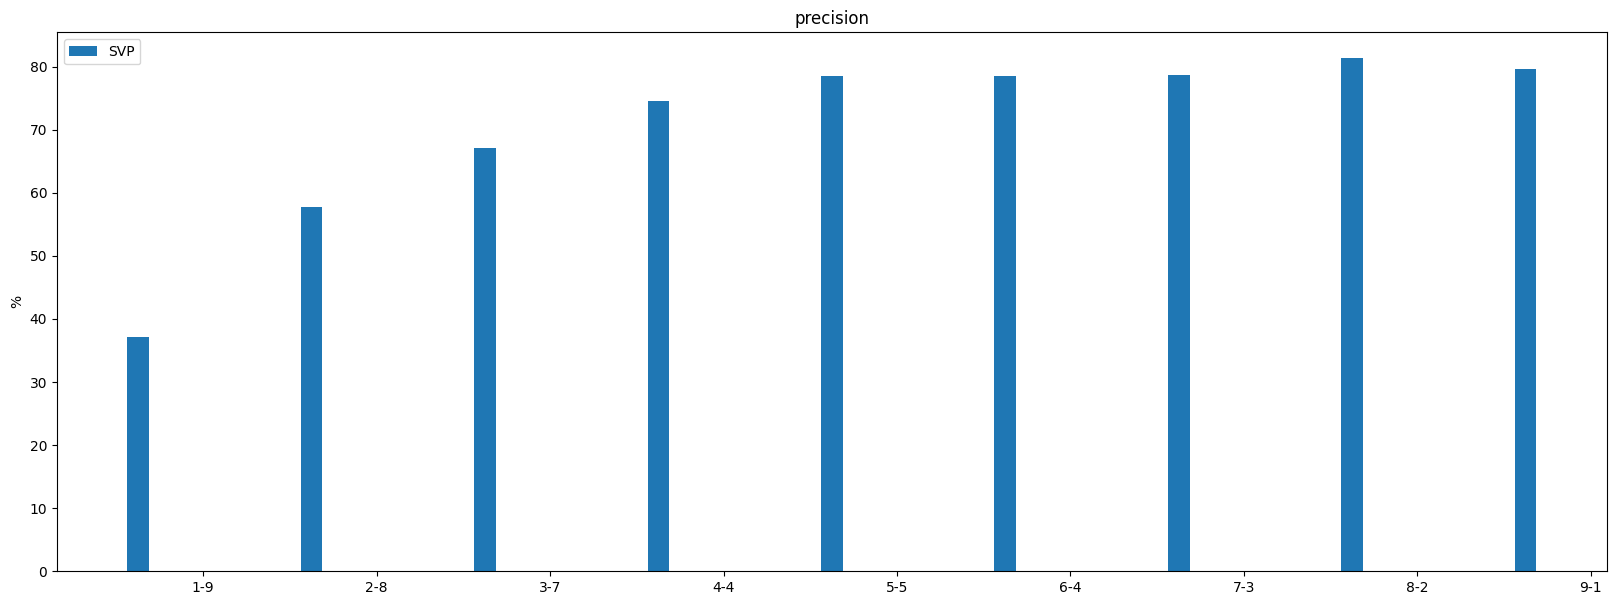

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
# plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题


species = ['1-9','2-8','3-7','4-4','5-5','6-4','7-3','8-2','9-1']
penguin_means = {
    'SVP':SVP_data_precision
}

x = np.arange(0,len(species)*2,step=2)  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize =(20, 7))


index_plot = 0
for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    if index_plot%2==0:
        multiplier = multiplier
        x_bar =x +   offset
    else:
        x_bar = x + offset
    index_plot= index_plot+1   
    rects = ax.bar(x_bar, measurement, width, label=attribute)
    
    for i, val in enumerate(measurement):
        if val == 0:
            ax.bar(x_bar[i], 100,width,hatch='/',color= rects[i].get_facecolor())  # 在柱状图上添加文本标记
    
    # ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('%')
ax.set_title('precision')
ax.set_xticks(x + width*3, species)
ax.legend(loc='upper left', ncols=1)

plt.show()

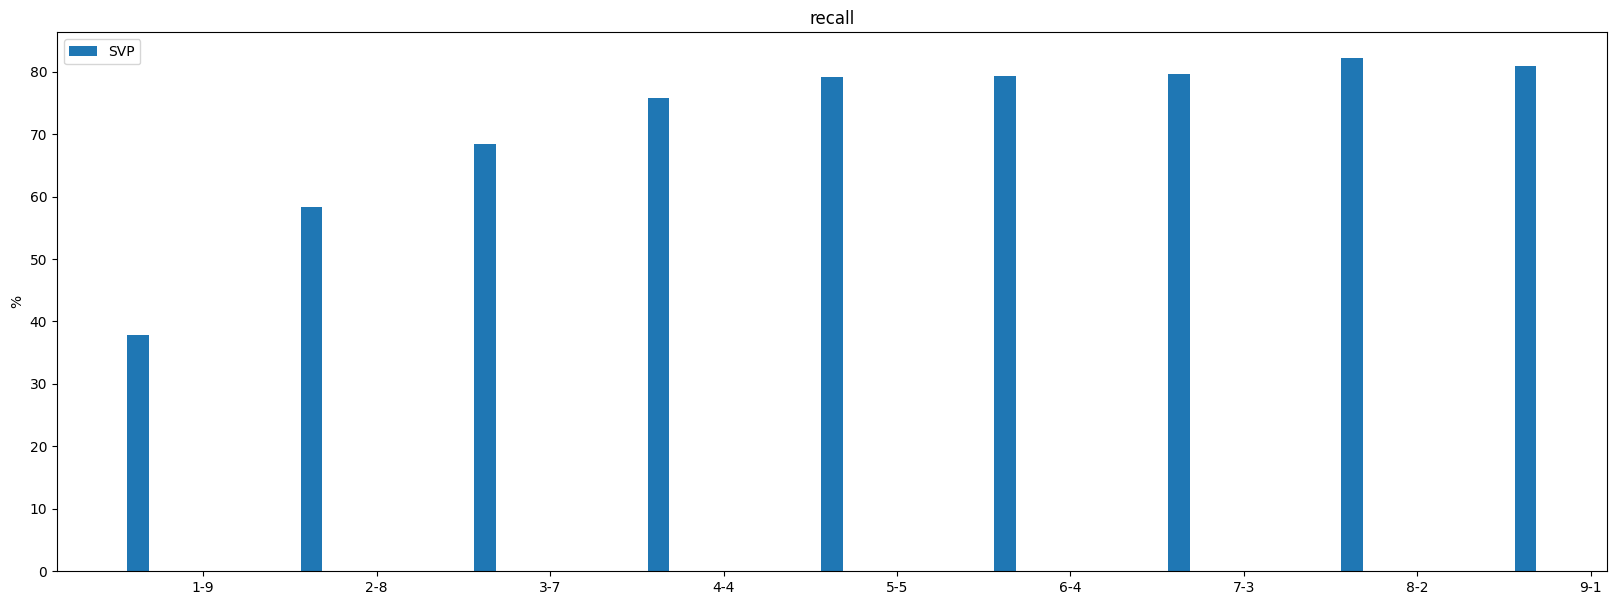

In [6]:
## 语义正确率柱状图分析

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
# plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题


species = ['1-9','2-8','3-7','4-4','5-5','6-4','7-3','8-2','9-1']
penguin_means = {
    'SVP': SVP_data_recall,
}

x = np.arange(0,len(species)*2,step=2)  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize =(20, 7))


index_plot = 0
for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    if index_plot%2==0:
        multiplier = multiplier
        x_bar =x +   offset
    else:
        x_bar = x + offset
    index_plot= index_plot+1   
    rects = ax.bar(x_bar, measurement, width, label=attribute)
    
    for i, val in enumerate(measurement):
        if val == 0:
            ax.bar(x_bar[i], 100,width,hatch='/',color= rects[i].get_facecolor())  # 在柱状图上添加文本标记
    
    # ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('%')
ax.set_title('recall')
ax.set_xticks(x + width*3, species)
ax.legend(loc='upper left', ncols=1)

plt.show()